# Лаба 4: Две задачи на сравнение центров распределений


### Let's Import all necessary libraries

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from collections import defaultdict
from tqdm.notebook import tqdm

In [197]:
import os

# This is my file path for the lab works
os.chdir("C:/Users/bahra/Desktop/Lect_01/Задачи для лабораторной 4")

# #Task 1: Nursing Home Data 
Variable Names:

* BED = number of beds in home
* MCDAYS = annual medical in-patient days (hundreds)
* TDAYS = annual total patient days (hundreds)
* PCREV = annual total patient care revenue (ℎ𝑢𝑛𝑑𝑟𝑒𝑑𝑠)∗𝑁𝑆𝐴𝐿=𝑎𝑛𝑛𝑢𝑎𝑙𝑛𝑢𝑟𝑠𝑖𝑛𝑔𝑠𝑎𝑙𝑎𝑟𝑖𝑒𝑠(hundreds)
* FEXP = annual facilities expenditures (hundreds)
* RURAL = rural (1) and non-rural (0) homes

Number of cases: 52

The data were collected by the Department of Social Services of the State of New Mexico, and cover 52 of the 60 licensed nursing facilities in the state in 1988. The operating statistics are number of beds, medical in-patient days, total patient days, total patient care revenue, annual nursing salaries, and annual facilities expenditures for rural and non-rural nursing homes.

These data are part of the data analyzed in Howard L. Smith, Niell F. Piland, and Nancy Fisher, "A Comparison of Financial Performance, Organizational Characteristics, and Management Strategy Among Rural and Urban Nursing Facilities, Journal of Rural Health, Winter 1992, pp 27-40.

Compare indicators for hospitals located outside the city and in the city. 
### Option 2: Annual Hospital Expenses (hundreds of dollars) 

In [198]:
# Let's read the data
df = pd.read_csv("Nursing Home Data/Nursing Home Data_data")
# Let's see what we have
df.head()

,BED MCDAYS TDAYS PCREV NSAL FEXP RURAL
0,244 128 385 23521 5230 ...
1,59 155 203 9160 245...
2,120 281 392 21900 6304 ...
3,120 291 419 22354 6590 ...
4,120 238 363 17421 5362 ...


As you can see the data is not well organized, so I will transform it to a convenient form

In [199]:
# Let's retrive the columns
cols = [i for i in df.columns.values[0].split(" ") if i != ""]

# Let's retrive the rows
rows = []
for arr in df.values:
    row = arr[0]
    new_row = [int(i) for i in row.split(" ") if i != ""]
    rows.append(new_row)

In [200]:
# Let's the columns and rows in a dataframe
df = pd.DataFrame(rows, columns=cols)

In [201]:
# Let's group by RURAL and count the values
df.groupby(["RURAL"]).count()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP
RURAL,,,,,,
0,18,18,18,18,18,18
1,34,34,34,34,34,34


* Now that looks good
* I will divide the data into rural and non-rural houses

In [202]:
df_rural = df[df["RURAL"] == 1]
df_rural.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
1,59,155,203,9160,2459,493,1
5,65,180,234,10531,3622,449,1
6,120,306,372,22147,4406,4998,1
7,90,214,305,14025,4173,966,1
9,120,133,188,11729,3224,6442,1


In [203]:
df_non_rural = df[df["RURAL"] == 0]
df_non_rural.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0
8,96,155,169,8812,1955,1260,0


##### Let's check our data for normality

In [204]:
# First test for rural
significant_results = defaultdict(list)

for test_name, test in dict_normal_tests.items():
    significant_results[test_name].append(test(df_rural.FEXP))

print("rural:", significant_results)

rural: defaultdict(<class 'list'>, {'shapiro': [1], 'kstest': [1]})


In [205]:
# Second test for non-rural
significant_results = defaultdict(list)

for test_name, test in dict_normal_tests.items():
    significant_results[test_name].append(test(df_non_rural.FEXP))

print("non_rural:", significant_results)   

non_rural: defaultdict(<class 'list'>, {'shapiro': [1], 'kstest': [1]})


* We see that both criteria show that the distribution of costs for these groups is not normal. 
* The hypothesis of normal distribution is rejected.



####  Let's continue the analysis: 
* let's consider histograms and find out whether the differences between the distributions of the compared populations are significant from the normal one. 
* Let's build histograms.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FEXP', ylabel='Density'>

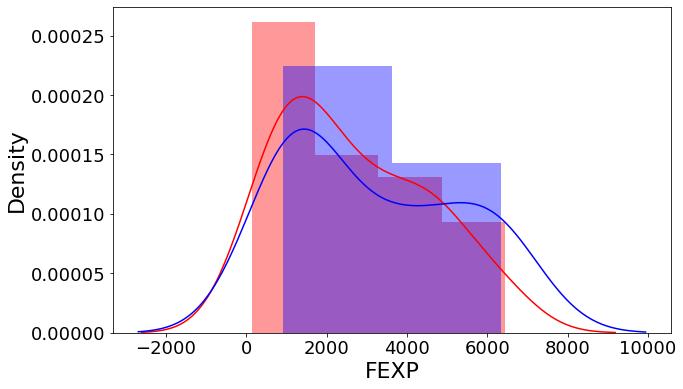

In [206]:
# The Red color distplot refers to RURAL row
sns.distplot(df_rural.FEXP,color='red')

# The Blue color distplot refers to NON-RURAL row
sns.distplot(df_non_rural.FEXP, color='blue')

* There are pronounced asymmetries on the presented histograms. 
* All this allows us to conclude that the distribution of expenditures in both groups differs significantly from the normal one. 
* The distribution in groups differs significantly from normal, we can conclude that it is impossible to compare the means (you cannot use the Student's t-test), but you need to compare the medians using the Mann-Whitney test.

### Checking for equality of medians 

#### To test the hypothesis about the equality of medians, we use the Mann-Whitney test for independent samples. 

It tests the following hypothesis:
* H: medians are equal
* K: medians are not equal

* First of let's define the function

In [207]:
# Let's define Mann-Whitney function to check the results
# I will use the 'stats' library for Mann-Whitney
# I will use the Hypothese 0.05 for Alpha
def checkMannwhitneyu(a, b, alpha=0.05):
    """Mann-Whitney test.
    Returns 1 if differences are significant."""
    _, pvalue = stats.mannwhitneyu(a, b, alternative='two-sided')
    return int(pvalue < alpha)

In [208]:
checkMannwhitneyu(df_rural.FEXP, df_non_rural.FEXP)

0

#### Let's check it with Bootstrap Sampling

###### Why Bootstrap Sampling?
Bootstrap sampling is a technique using which you can estimate parameters like mean for an entire population without explicitly considering each and every data point in the population.

* First of let's define the function

In [209]:
# Let's define Bootstrap function to check the results
# I will use the Hypothese 0.05 for Alpha
# Parameter func for mean values using numpy library
def checkBootstrapSampling(a, b, func=np.mean, B=1000, alpha=0.05):
    """Бутстрап. Возвращает 1, если отличия значимы."""
    a_bootstrap = np.random.choice(a, size=(len(a), B))
    b_bootstrap = np.random.choice(b, size=(len(b), B))
    list_diff = func(a_bootstrap, axis=0) - func(b_bootstrap, axis=0)
    left_bound = np.quantile(list_diff, alpha / 2)
    right_bound = np.quantile(list_diff, 1 - alpha / 2)
    res = 1 if (left_bound > 0) or (right_bound < 0) else 0
    return res

In [210]:
checkBootstrapSampling(df_rural.FEXP, df_non_rural.FEXP, func=np.median)

0

###### The hypothesis of equality of medians is not rejected. We interpret the result: 
* hospital expenses for the year in cities and outside the city can be considered approximately equal.

#### For a more visual representation of the results of the analysis, we present a box diagram built on the basis of the compared samples:

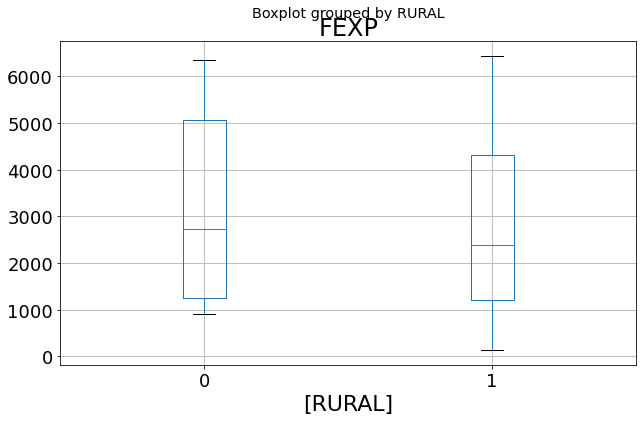

In [211]:
boxplot = df.boxplot(column=['FEXP'], by=['RURAL'])

* As you can see, the averages are really about the same

# Task 2: Unions and State Labor Law 
Variable Names:

* DENS: Percent of public sector employees in unions, 1982
* COMP: State bargaining laws cover public employees (1) or not (0)
* RTW: State right-to-work law (1) or not (0)
* PVT: Percent of private sector employees in unions, 1982

Number of cases: 50

Meltz analyzed factors associated with differences in the percent of public sector employees belonging to unions by states in the United States and by provinces in Canada. While he did not run formal regression analyses, he finds the major source of difference in public union density to be the differences in percent of private sector employees in unions.

The dummy variables for presence of state bargaining laws covering public employees and presence of state right to work laws in the datafile provide an opportunity to examine a two-predictor regression involving dummy variables. In this case there is interaction between the two dummy variables and this calls for interpretation. The interaction variable forms a two-way classification table and the regression equation estimates the means of the observations in the four cells. In the current case the main effect of right-to-work laws is not significant, but the interaction with comprehensive state bargaining laws is. The presence of right-to-work laws is said then to modify the relation between unionization and state bargaining laws covering public employees. Right-to-work laws would be termed a moderator variable.

Reference: NM Meltz, "Interstate and Interprovincial Differences in Union Density," Industrial Relations, 28:2 (Spring 1989), 142-158.

##### Compare the percentage of municipal employees who were unionized in 1982 in different US states. Comparing states that differ in whether these states passed the corresponding law (code 1) or did not pass it (code 0) 
##### Option 2: compares states that have passed the State right-to-work law and those that have not.

In [225]:
# I will read and separate the data with '\t'
df = pd.read_csv("Unions and State Labor Law/Unions and State Labor Law_data", sep="\t")
df.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


* I will calculate the percentage of municipal employees as DENS + PVT
* Then I will group by 'RTW'

In [213]:
df["MP"] = df.DENS + df.PVT

In [214]:
df.groupby(["RTW"]).count()

,STATE,DENS,COMP,PVT,MP
RTW,,,,,
0,30,30,30,30,30
1,20,20,20,20,20


* I will divide the data into states where the State right-to-work law is adopted and where it is not adopted

In [215]:
df_RTW = df[df.RTW == 1]
df_RTW.head()

,STATE,DENS,COMP,RTW,PVT,MP
15,NV,38.0,0,1,19.4,57.4
17,IO,35.0,1,1,16.9,51.9
26,AL,32.4,0,1,14.2,46.6
28,TN,33.0,0,1,14.0,47.0
29,UT,42.3,0,1,9.4,51.7


In [216]:
df_non_RTW = df[df.RTW == 0]
df_non_RTW.head()

,STATE,DENS,COMP,RTW,PVT,MP
0,NY,56.9,1,0,31.2,88.1
1,MI,49.6,1,0,30.2,79.8
2,WA,32.4,1,0,33.1,65.5
3,HI,54.6,1,0,24.7,79.3
4,AK,30.7,1,0,30.1,60.8


##### Let's check our data for normality

In [217]:
significant_results = defaultdict(list)

for test_name, test in dict_normal_tests.items():
    significant_results[test_name].append(test(df_RTW.MP))

print("RTW:", significant_results)    

RTW: defaultdict(<class 'list'>, {'shapiro': [0], 'kstest': [1]})


In [218]:
significant_results = defaultdict(list)

for test_name, test in dict_normal_tests.items():
    significant_results[test_name].append(test(df_non_RTW.MP))

print("non_RTW:", significant_results)   

non_RTW: defaultdict(<class 'list'>, {'shapiro': [0], 'kstest': [1]})


* We see that both criteria show different results. 
* Shapiro says that the distributions of the percentage of municipal employees for these groups are normal, while the Kolmogorov-Smirnov test says the opposite for both distributions.

#### Let's continue the analysis: 
* Let's consider histograms and find out whether the differences between the distributions of the compared populations are significant from the normal one. 
* Let's build histograms.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MP', ylabel='Density'>

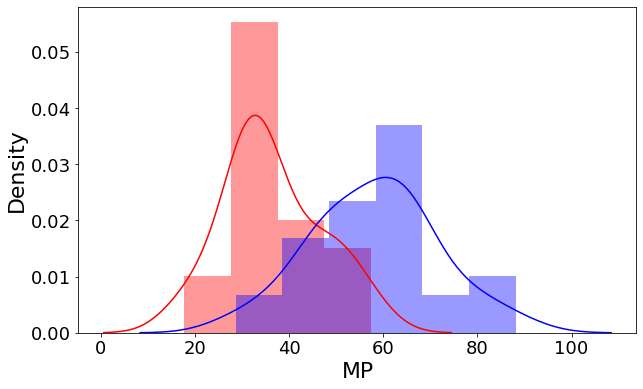

In [219]:
# Red color for RTW
sns.distplot(df_RTW.MP, color='red')

# Blue color for non-RTW
sns.distplot(df_non_RTW.MP, color='blue')

* There are no pronounced asymmetries in the presented histograms. 
* Therefore, we cannot say that the distribution of expenditures in both groups differs significantly from normal or does not differ. 
* Let's post more qq graphics.

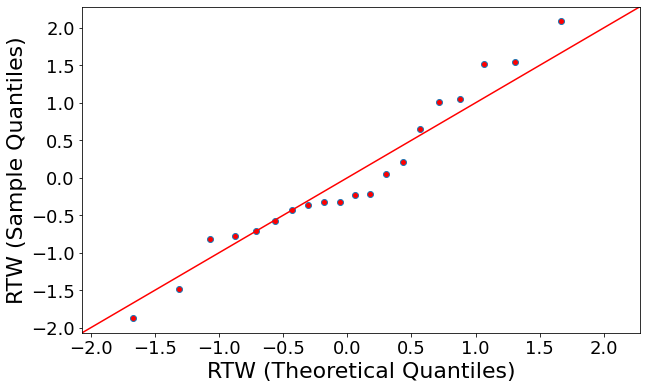

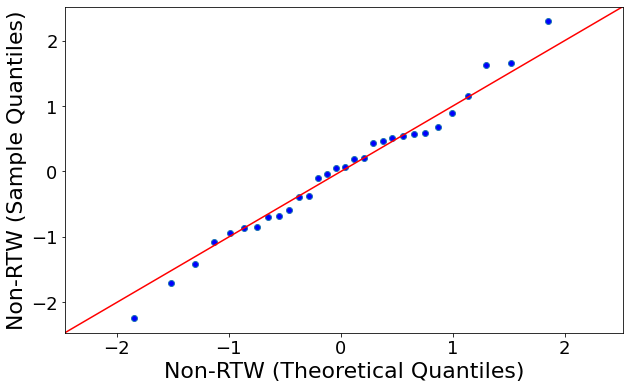

In [220]:
# Let's import statsmodels.api library for ploting
import statsmodels.api as sm

# Red color for RTW
sm.qqplot(df_RTW.MP, fit=True, line='45', markerfacecolor='red', xlabel='RTW (Theoretical Quantiles)', ylabel='RTW (Sample Quantiles)')

# Blue color for non-RTW
sm.qqplot(df_non_RTW.MP, fit=True, line='45', markerfacecolor='blue', xlabel='Non-RTW (Theoretical Quantiles)', ylabel='Non-RTW (Sample Quantiles)')
plt.show()

* On the graphs, the data are located approximately on the same line, so we will trust that we will consider the data to be normal and we will use the Student's-test to test the hypothesis of equality of the means.

### Checking equality of means 
#### To test the hypothesis of equality of means, we use Student's t-test for independent samples. It tests the following hypothesis:

* H: averages are equal
* K: averages are not equal

* First let's define the Student's-test function

In [221]:
# Let's define Mann-Whitney function to check the results
# I will use the 'stats' library for Mann-Whitney
# I will use the Hypothese 0.05 for Alpha
def check_ttest(a, b, alpha=0.02):
    """Тест Стьюдента. Возвращает 1, если отличия значимы."""
    _, pvalue = stats.ttest_ind(a, b)
    return int(pvalue < alpha)

In [222]:
check_ttest(df_RTW.MP, df_non_RTW.MP)

1

* Let's also check it with bootstrap sampling

In [223]:
# We already defined the function, so I will just reuse it
check_bootstrap(df_RTW.MP, df_non_RTW.MP)

1

##### The hypothesis of equality of means is rejected. We interpret the result: 
* The percentage of municipal employees in the states in which the State right-to-work law is passed and in which the law is not passed are significantly different.

#### Let's illustrate the result of this test

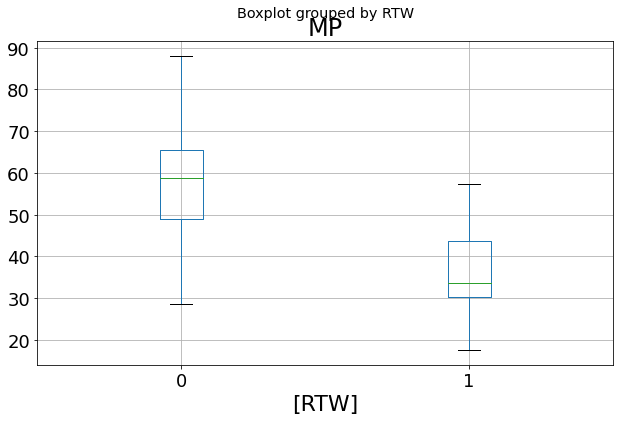

In [224]:
boxplot = df.boxplot(column=['MP'], by=['RTW'])

* As you can see, even visually the averages really differ